# Práctica 1

## 1. Conjunto de Cantor

### Ejercicios previos

#### Dibuja un segmento de longitud 1.

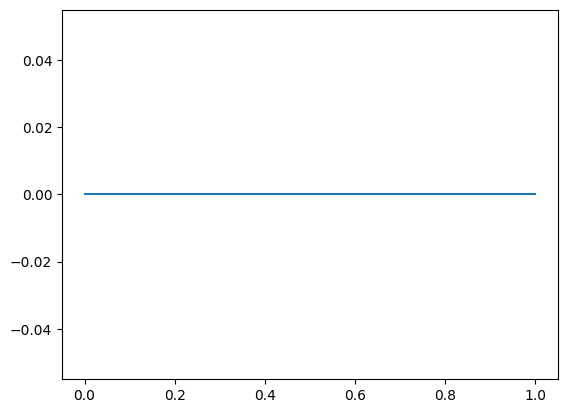

In [26]:
import matplotlib.pyplot as plt

x = [0, 1]
y = [0, 0]

plt.figure()
plt.plot(x, y)

#### Dibuja dos segmentos: [0,1/3] y [2/3,1]. 

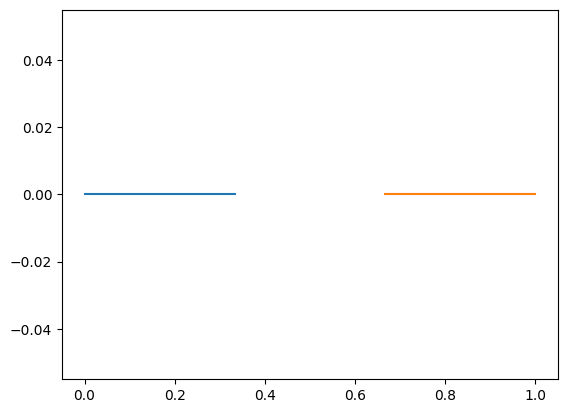

In [27]:
x1 = [0, 1/3]
y1 = [0, 0]

x2 = [2/3, 1]
y2 = [0, 0]

plt.figure()
plt.plot(x1, y1)
plt.plot(x2, y2)

#### Dibuja una secuencia de 10 intervalos en [0,1] separados regularmente

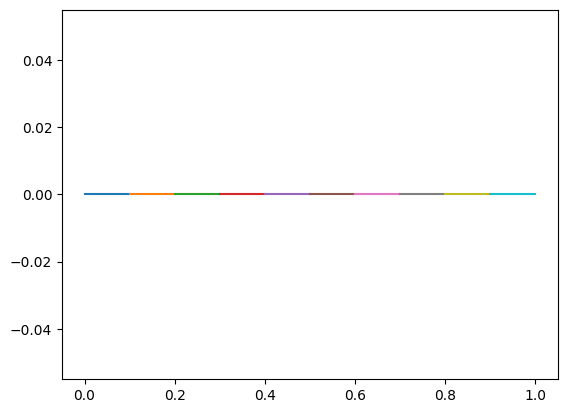

In [28]:
import numpy as np

# Puntos de división
x_points = np.linspace(0, 1, 10 + 1)

plt.figure()

# Dibujar cada intervalo
for i in range(10):
    x_segment = [x_points[i], x_points[i+1]]
    y_segment = [0, 0]
    plt.plot(x_segment, y_segment)

### Procedimientos para las funciones:

#### Hacer un procedimiento que tenga como entrada (n,p), donde n puede tomar los valores 1 ó 2, según se aplique la función f_1 o f_2 en la construcción del conjunto de Cantor de razón 1/3. El parámetro p es un vector de puntos a los que se aplica la función correspondiente. 

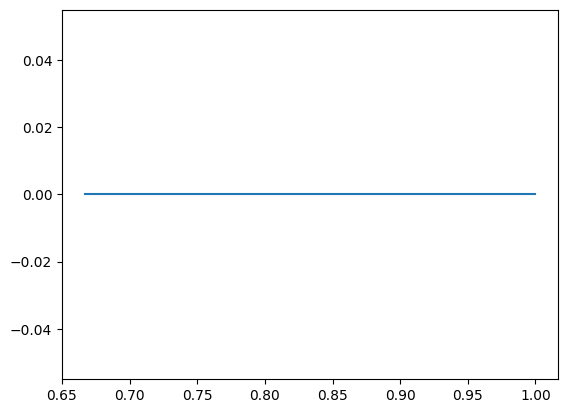

In [29]:
def f1(n, p):
    if n == 1:
        return [[coord / 3 for coord in point] for point in p]
    elif n == 2:
        return [[2/3 + point[0] / 3, point[1] / 3] for point in p]

puntos = [[0, 0], [1, 0]]
resultados = f1(2, puntos)
x_vals = [pt[0] for pt in resultados]
y_vals = [pt[1] for pt in resultados]

plt.plot(x_vals, y_vals)

### Paso n-ésimo. Hacer un procedimiento para dibujar el paso n-ésimo del conjunto de cantor

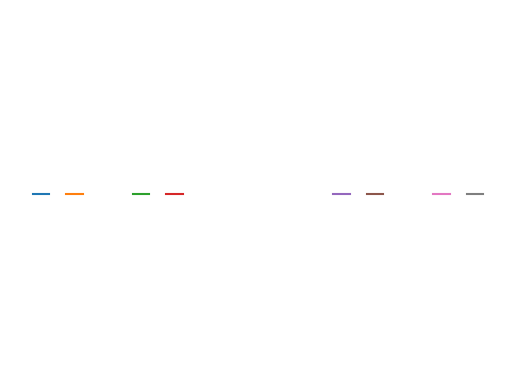

In [30]:
def cantorn(n):
    segments = [[[0, 0], [1, 0]]]
    for i in range(n):
        new_segments = []
        for j in [1, 2]:
            for seg in segments:
                new_segments.append(f1(j, seg))
        segments = new_segments
    plt.figure()
    for seg in segments:
        plt.plot([seg[0][0], seg[1][0]], [seg[0][1], seg[1][1]])
    plt.axis('off')
    plt.show()

# Ejemplo:
cantorn(3)


## 2. Conjunto de Cantor generalizado

### Hacer un procedimiento que tenga como entrada (n,r), donde r es la razón de las semejanzas y n es la iteración. 

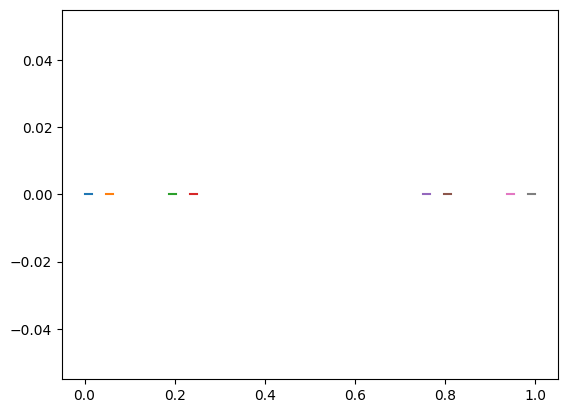

In [35]:
def razon(n, r, seg):
    if n == 1:
        return [[coord / r for coord in punto] for punto in seg]
    elif n == 2:
        return [[(punto[0] / r) + (1 - 1/r), punto[1] / r] for punto in seg]

def cantor(n, r):
    segmentos = [[[0, 0], [1, 0]]]
    for i in range(n):
        nuevos = []
        for j in [1, 2]:
            for seg in segmentos:
                nuevos.append(razon(j, r, seg))
        segmentos = nuevos
    plt.figure()
    for seg in segmentos:
        plt.plot([seg[0][0], seg[1][0]], [seg[0][1], seg[1][1]])

cantor(3, 4)


### Hacer un conjunto tipo Cantor con más de dos semejanzas. 

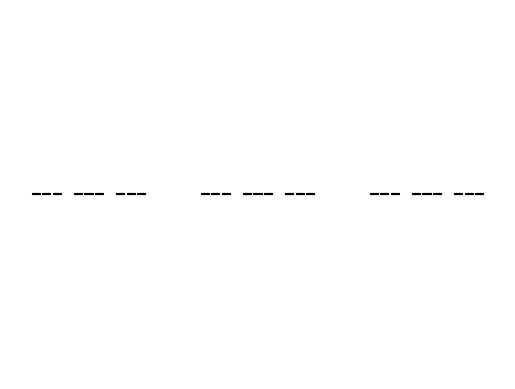

In [37]:
import matplotlib.pyplot as plt

def transformar_segmento(segmento, escala, traslacion):
    """
    Aplica una transformación afín al segmento.
    
    Parámetros:
      segmento   : lista de dos puntos [[x0,y0], [x1,y1]].
      escala     : factor de escala (para ambas coordenadas, aunque solo se altera x con traslación).
      traslacion : traslación a sumar en la coordenada x.
    
    Retorna:
      Nuevo segmento transformado.
    """
    return [
        [escala * segmento[0][0] + traslacion, escala * segmento[0][1]],
        [escala * segmento[1][0] + traslacion, escala * segmento[1][1]]
    ]

def cantor_general(n, semejanzas):
    # Segmento inicial
    segmentos = [[[0, 0], [1, 0]]]
    
    # Iterar
    for _ in range(n):
        nuevos_segmentos = []
        for seg in segmentos:
            for (esc, tras) in semejanzas:
                nuevos_segmentos.append(transformar_segmento(seg, esc, tras))
        segmentos = nuevos_segmentos
    return segmentos

def graficar_segmentos(segmentos):
    """Grafica todos los segmentos en una misma figura."""
    plt.figure()
    for seg in segmentos:
        plt.plot([seg[0][0], seg[1][0]], [seg[0][1], seg[1][1]], 'k-')
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# Definir las semejanzas:
# En este ejemplo, usamos tres semejanzas con factor de escala 1/4 y traslaciones 0, 1/4 y 1/2.
semejanzas = [(1/4, 0), (1/4, 1/4), (1/4, 1/2)]

# Número de iteraciones (cuanto mayor sea, más detalles tendrá el fractal)
num_iteraciones = 5

# Generar el conjunto tipo Cantor generalizado
segmentos_resultantes = cantor_general(num_iteraciones, semejanzas)

# Graficar el resultado
graficar_segmentos(segmentos_resultantes)

